In [1]:
from volterra_collocation_solver import solve_VIDE
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
g_func = lambda t: t
kern_func = lambda x: 0.0
a_func = lambda t: -1.0
expected_soln = lambda t: 3*np.exp(-t) + t - 1

# g_func = lambda t: np.cos(t) - 0.5*(np.exp(-t)+np.sin(t)-np.cos(t)) - np.sin(t)/(1.0 + t**2)
# kern_func = lambda x: np.exp(-x)
# a_func = lambda t: 1 / (1.0 + t**2)
# expected_soln = lambda t: np.sin(t)

g_noise = 0.0
a_noise = 0.0
kern_noise = 0.0

In [3]:
# The possible collocation parameters are 0, 1/coll_divs, 2/coll_divs, ..., 1
coll_divs = 3

# This list indicates which of the possible collocation parameters we want
coll_choices = [1,2,3]

# Create Input Data

In [4]:
num_data_pts = 160*coll_divs**2 + 1
time_step = 0.0125

data_times = np.array([i*time_step for i in range(num_data_pts)])

kernel_data = np.array(
    [kern_func(x) + kern_noise * np.random.normal(0,1) for x in data_times])

g_data = np.array(
    [g_func(x) + g_noise * np.random.normal(0,1) for x in data_times])

a_data = np.array(
    [a_func(x) + a_noise * np.random.normal(0,1) for x in data_times])

# Call the Solver

In [5]:
(soln_vals, soln_polys) = solve_VIDE(
    g_values=g_data,
    kernel_values=kernel_data,
    a_values=a_data,
    soln_init_value=expected_soln(data_times[0]),
    coll_divs=coll_divs,
    coll_choices=coll_choices,
    time_step=time_step,
    return_polys=True)

# Graph the Results

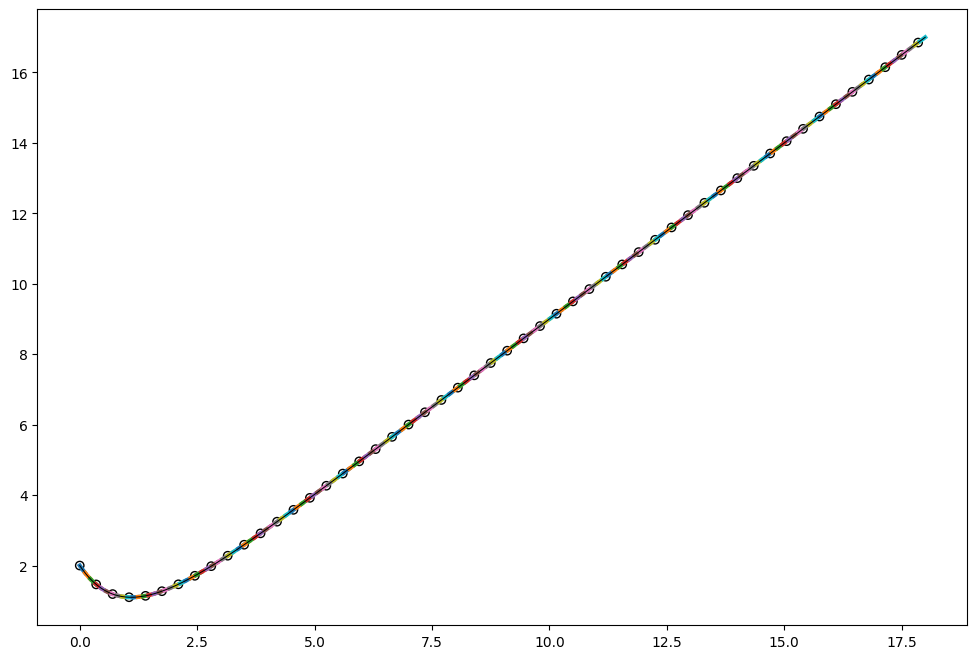

In [6]:
# black line indicates list of returned solution values
skip = int(len(data_times) / 50)
plt.plot(data_times, soln_vals, color='black', zorder=10, linewidth=0.75)

# We also draw the piecewise polynomials
mesh_divs = int((num_data_pts-1) / coll_divs**2)
mesh_dt = time_step * coll_divs**2
for mesh_indx in range(mesh_divs):
    times = data_times[mesh_indx * coll_divs**2 : (mesh_indx + 1) * coll_divs**2 + 1]
    t_base = data_times[mesh_indx * coll_divs**2]
    values = [soln_polys[mesh_indx]((t - t_base)/mesh_dt) for t in times]
    plt.plot(times, values, linewidth=3)

plt.scatter(data_times[::skip], [expected_soln(x) for x in data_times[::skip]], marker='o',
            facecolors='none', color="black", zorder=-10);